In [45]:
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.linear_model import Perceptron
import numpy as np
import matplotlib.pyplot as plt

class PerceptronClassifier(BaseEstimator,ClassifierMixin):

    def __init__(self, numParameters, lr=.1, shuffle=True, deterministic=None):
        """ 
            Initialize class with chosen hyperparameters.
        Args:
            lr (float): A learning rate / step size.
            shuffle: Whether to shuffle the training data each epoch. DO NOT 
            SHUFFLE for evaluation / debug datasets.
        """
        self.lr = lr
        self.shuffle = shuffle
        self.deterministic = deterministic
        self.numParameters = numParameters

    def fit(self, X, y, initial_weights=None):
        """ 
            Fit the data; run the algorithm and adjust the weights to find a 
            good solution
        Args:
            X (array-like): A 2D numpy array with the training data, excluding
            targets
            y (array-like): A 1D numpy array with the training targets
            initial_weights (array-like): allows the user to provide initial 
            weights
        Returns:
            self: this allows this to be chained, e.g. model.fit(X,y).predict(X_test)
        """
        self.weights = self.initialize_weights() if not initial_weights else initial_weights

        if self.deterministic == 10:
          print("Starting 10 epochs of training...")
          for x in range(10):
            numCorrect = 0
            for data in range(len(y)):
              net = np.dot(self.weights,X[data])

              output = 0  
              if net > 0:
                output = 1

              if output != y[data]:
                for weight in range(len(self.weights)):
                  self.weights[weight] += self.lr*(y[data] - output)*X[data][weight]
              else:
                numCorrect+= 1

            iterationAccuracy = numCorrect/len(y)
            if self.shuffle == True:
              self._shuffle_data(self, X, y)
        else:
          num = 0
          epochs = 0
          iterationAccuracy = 0
          while num < 5:
            epochs += 1
            numCorrect = 0
            for data in range(len(y)):
              net = np.dot(self.weights,X[data])
              
              if net > 0:
                output = 1
              else:
                output = 0

              if output != y[data]:
                for weight in range(len(self.weights)):
                  self.weights[weight] += self.lr*(y[data] - output)*X[data][weight]
              else:
                numCorrect += 1


            previousAccuracy = iterationAccuracy
            iterationAccuracy = numCorrect/y.size

            if (iterationAccuracy - previousAccuracy) < 0.05:
              num += 1

            if self.shuffle == True:
              self._shuffle_data(self, X, y)

          print("Numer of epochs: ", epochs)

        return self

    def predict(self, X):
        """ 
            Predict all classes for a dataset X
        Args:
            X (array-like): A 2D numpy array with the training data, excluding 
            targets
        Returns:
            array, shape (n_samples,)
                Predicted target values per element in X.
        """

        predictions = np.empty(X.shape[0])

        for data in range(X.shape[0]):
          net = np.dot(self.weights,X[data])

          if net > 0:
            output = 1
          else:
            output = 0
            
          predictions[data] = output

        return predictions

    def initialize_weights(self):
        """ Initialize weights for perceptron. Don't forget the bias!
        Returns:
        """
        return np.zeros(self.numParameters)

    def score(self, X, y):
        """ 
            Return accuracy of model on a given dataset. Must implement own 
            score function.
        Args:
            X (array-like): A 2D numpy array with data, excluding targets
            y (array-like): A 2D numpy array with targets
        Returns:
            score : float
                Mean accuracy of self.predict(X) wrt. y.
        """

        results = self.predict(X)

        numCorrect = 0
        for i in range(len(y)):
          if results[i] == y[i]:
            numCorrect += 1

        return numCorrect/y.shape[0]

    def _shuffle_data(self, X, y):
        """ 
            Shuffle the data! This _ prefix suggests that this method should 
            only be called internally.
            It might be easier to concatenate X & y and shuffle a single 2D 
            array, rather than shuffling X and y exactly the same way, 
            independently.
        """
        import random

        random.shuffle(X)
        random.shuffle(y)

    ### Not required by sk-learn but required by us for grading. Returns the weights.
    def get_weights(self):
        return self.weights


In [3]:
# DEBUG DATASET

from scipy.io import arff
import pandas as pd

# Download file with curl
!curl https://raw.githubusercontent.com/cs472ta/CS472/master/datasets/linsep2nonorigin.arff --output debug-dataset.arff

data = arff.loadarff('debug-dataset.arff')
df = pd.DataFrame(data[0])

df['class'] = [int(s.decode()) for s in df['class']]

data = np.array(df)
X = data[:,0:-1]
biasInputs = np.ones((X.shape[0],1))
X = np.append(X, biasInputs, 1)
y = df['class']

debugPerceptron = PerceptronClassifier( X.shape[1], .1, False, 10)

debugPerceptron.fit(X, y)
accuracy = debugPerceptron.score(X, y)

print("Final weights: ", debugPerceptron.get_weights())
print("Final accuracy: ", accuracy)

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   197  100   197    0     0   1254      0 --:--:-- --:--:-- --:--:--  1254
Starting 10 epochs of training...
Final weights:  [-0.23  0.18 -0.1 ]
Final accuracy:  0.875


In [35]:
# EVALUATION DATASET

# Download file with curl
!curl https://raw.githubusercontent.com/cs472ta/CS472/master/datasets/data_banknote_authentication.arff --output evaluation-dataset.arff

data2 = arff.loadarff('evaluation-dataset.arff')
df2 = pd.DataFrame(data2[0])

df2['class'] = [int(s.decode()) for s in df2['class']]

data2 = np.array(df2)
X2 = data2[:,0:-1]
biasInputs2 = np.ones((X2.shape[0],1))
X2 = np.append(X2, biasInputs2, 1)
y2 = df2['class']

evalPerceptron = PerceptronClassifier(X2.shape[1], .1, False, 10)

evalPerceptron.fit(X2, y2)
accuracy2 = evalPerceptron.score(X2, y2)

print("Final weights: ", evalPerceptron.get_weights())
print("Final accuracy: ", accuracy2)

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 46685  100 46685    0     0   239k      0 --:--:-- --:--:-- --:--:--  238k
0       0
1       0
2       0
3       0
4       0
       ..
1367    1
1368    1
1369    1
1370    1
1371    1
Name: class, Length: 1372, dtype: int64
5
Starting 10 epochs of training...
Final weights:  [-3.80657242 -2.840821   -3.0719334  -1.4003906   4.9       ]
Final accuracy:  0.9876093294460642


Final weights after running the Evaluation Dataset: [-3.80657242, -2.840821,   -3.0719334,  -1.4003906,   4.9   ]

<function matplotlib.pyplot.show>

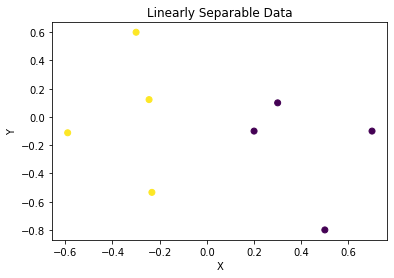

In [57]:
# CREATE AND GRAPH 2 DATASETS

import matplotlib.pyplot as plt

dataset1 = np.array([[-0.245, 0.123, 1], [-0.233, -0.534, 1], [-0.59, -0.112, 1], [-0.3, 0.6, 1], [0.3, 0.1, 0], [0.2, -0.1, 0], [0.7, -0.1, 0], [0.5, -0.8, 0]])

plt.title('Linearly Separable Data')
plt.xlabel('X')
plt.ylabel('Y')

plt.scatter(dataset1[:,0], dataset1[:,1], c=dataset1[:,2])
plt.show

<function matplotlib.pyplot.show>

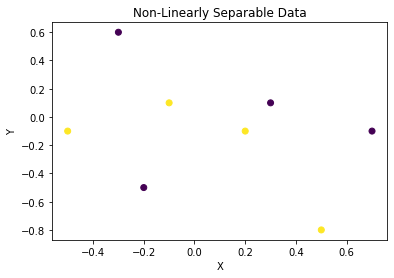

In [32]:
dataset2 = np.array([[-0.1, 0.1, 1], [-0.5, -0.1, 1], [0.2, -0.1, 1], [0.5, -0.8, 1], [-0.2, -0.5, 0], [-0.3, 0.6, 0], [0.3, 0.1, 0], [0.7, -0.1, 0]])

plt.title('Non-Linearly Separable Data')
plt.xlabel('X')
plt.ylabel('Y')

plt.scatter(dataset2[:,0], dataset2[:,1], c=dataset2[:,2])
plt.show

In [58]:
# TRAIN ON THE CREATED DATASETS

X3 = dataset1[:,0:-1]
biasInputs3 = np.ones((X3.shape[0],1))
X3 = np.append(X3, biasInputs3, 1)
y3 = np.transpose(dataset1[:,2])

X4 = dataset2[:,0:-1]
X4 = np.append(X4, biasInputs3, 1)
y4 = np.transpose(dataset2[:,2])

print("LEARNING RATE = 0.3")
perceptron1 = PerceptronClassifier(X3.shape[1], 0.3, False)
perceptron1.fit(X3, y3)

print("Final weights for dataset1: ", perceptron1.get_weights())
print("Final accuracy for dataset1: ", perceptron1.score(X3, y3))

perceptron2 = PerceptronClassifier(X4.shape[1], 0.3, False)
perceptron2.fit(X4, y4)

print("Final weights for dataset2: ", perceptron2.get_weights())
print("Final accuracy for dataset2: ", perceptron2.score(X4, y4))

print("LEARNING RATE = 0.1")
perceptron3 = PerceptronClassifier(X3.shape[1], 0.3, False)
perceptron3.fit(X3, y3)

weightsForGraph1 = perceptron3.get_weights()

print("Final weights for dataset1: ", weightsForGraph1)
print("Final accuracy for dataset1: ", perceptron3.score(X3, y3))

perceptron4 = PerceptronClassifier(X4.shape[1], 0.3, False)
perceptron4.fit(X4, y4)

weightsForGraph2 = perceptron4.get_weights()

print("Final weights for dataset2: ", weightsForGraph2)
print("Final accuracy for dataset2: ", perceptron4.score(X4, y4))


LEARNING RATE = 0.3
Numer of epochs:  7
Final weights for dataset1:  [-0.1635  0.0069  0.    ]
Final accuracy for dataset1:  1.0
Numer of epochs:  9
Final weights for dataset2:  [-0.03 -0.18  0.  ]
Final accuracy for dataset2:  0.75
LEARNING RATE = 0.1
Numer of epochs:  7
Final weights for dataset1:  [-0.1635  0.0069  0.    ]
Final accuracy for dataset1:  1.0
Numer of epochs:  9
Final weights for dataset2:  [-0.03 -0.18  0.  ]
Final accuracy for dataset2:  0.75


For dataset 1, 7 epochs are completed, whereas for dataset 2, 9 epochs are completed. Changing the learning rate made no difference in that measure. The learning rate also had no effect on the final weights and accuracy for the 2 datasets.

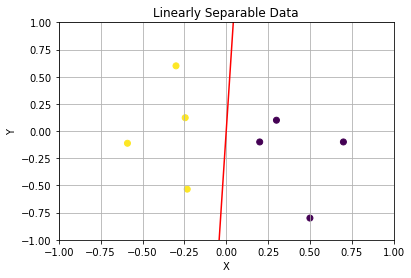

In [60]:
# GRAPH DECISION LINES

x = np.linspace(-1, 1, 100)
y = (-weightsForGraph1[0]/weightsForGraph1[1])*x - (weightsForGraph1[2]/weightsForGraph1[1])

plt.title('Linearly Separable Data')
plt.xlabel('X')
plt.ylabel('Y')

plt.scatter(dataset1[:,0], dataset1[:,1], c=dataset1[:,2])
plt.plot(x,y, '-r')
plt.xlim(-1, 1)
plt.ylim(-1,1)
plt.grid()
plt.show()

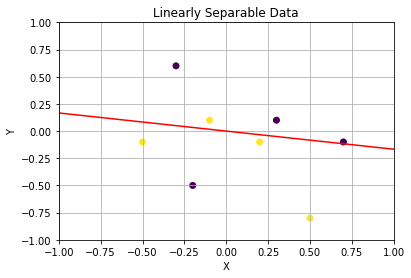

In [61]:
x = np.linspace(-1, 1, 100)
y = (-weightsForGraph2[0]/weightsForGraph2[1])*x - (weightsForGraph2[2]/weightsForGraph2[1])

plt.title('Linearly Separable Data')
plt.xlabel('X')
plt.ylabel('Y')

plt.scatter(dataset2[:,0], dataset2[:,1], c=dataset2[:,2])
plt.plot(x,y, '-r')
plt.xlim(-1, 1)
plt.ylim(-1,1)
plt.grid()
plt.show()